In [370]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [371]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

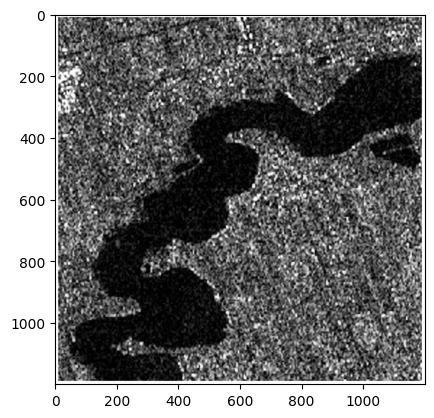

In [372]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [373]:
import copy

bin_img = copy.deepcopy(image_gray)
T = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

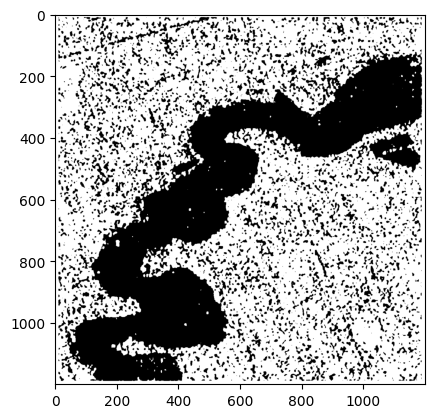

In [374]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [375]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

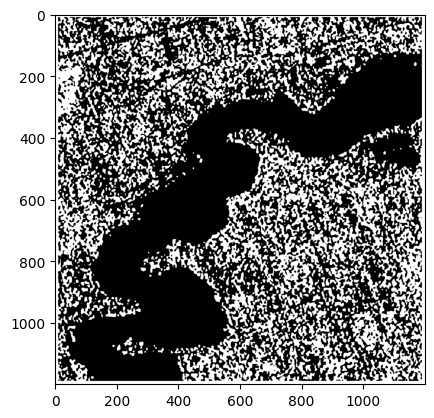

In [376]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [377]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


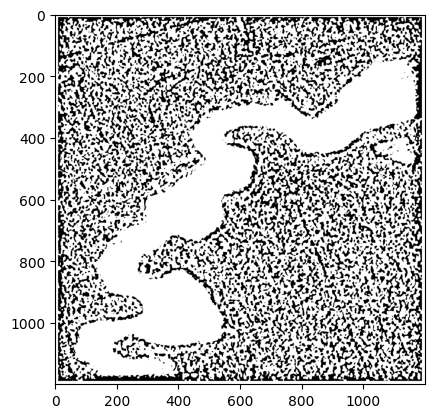

In [378]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [379]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

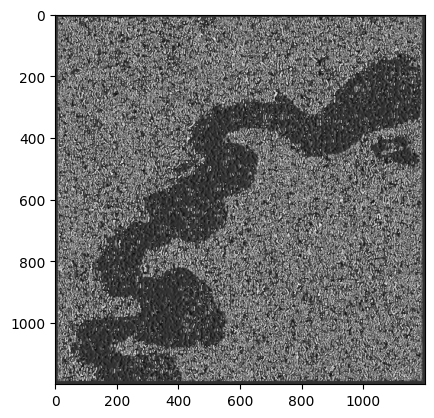

In [380]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

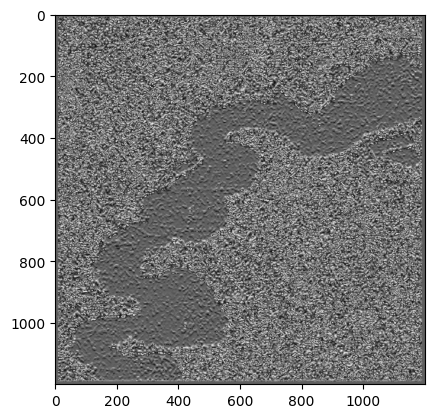

In [381]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [382]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

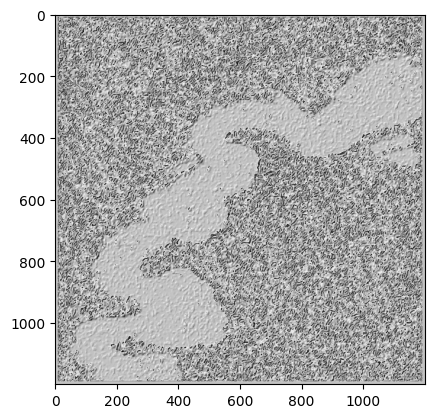

In [383]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [ ]:
bin_img = copy.deepcopy(image_gray)
T = 120
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
edges = cv2.Canny(bin_img,0,200)

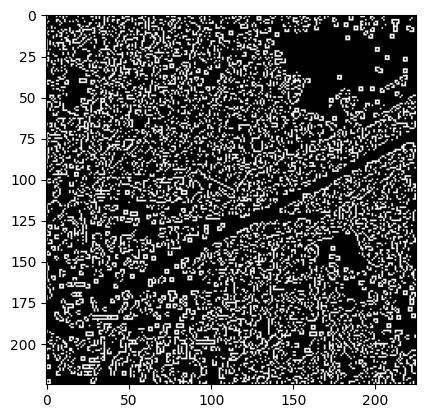

In [612]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [613]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

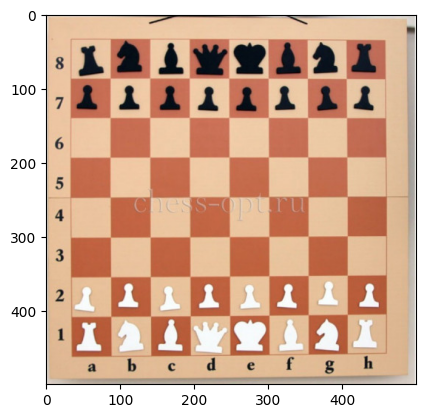

In [614]:
plt.imshow(image)

In [615]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [616]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [617]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

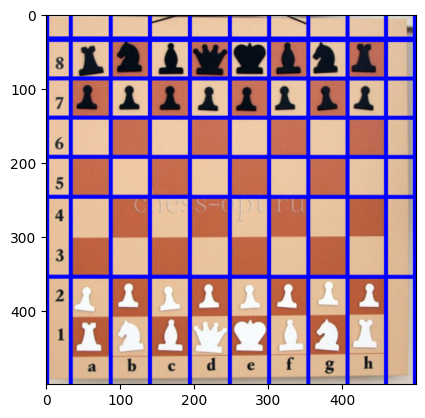

In [618]:
plt.imshow(image)

In [619]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

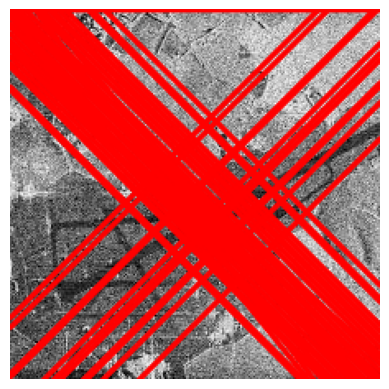

In [620]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

canny = cv2.Canny(th2, 0, 250)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 90)

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

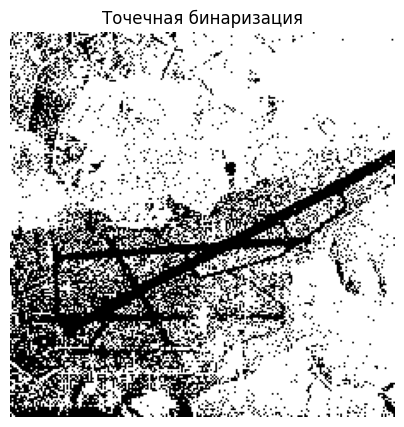

In [621]:
plt.figure(figsize=(12, 5))

_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.title('Точечная бинаризация')
plt.axis('off')